In [65]:
from math import sin, sqrt, cos, pi
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def f1(x): 
    return 10 + x**2*0.5 - 10*cos(2*x)
first_range = (-2*pi, 2*pi)

In [77]:
def f2(x):
    return -x * sin(sqrt(3*abs(x-1)))
second_range = (-100.0, 100.0)

In [10]:
data = [(f1, first_range), (f2, second_range)]

In [ ]:
def polynomial(x, i):
    return x**i

def generate_polynomial(coeff):
    return lambda x: sum(a * polynomial(x, i) for (i,a) in enumerate(coeff))

def polynomial_aproximation(f, f_range, m, n):
    samples = generate_data(f, f_range, n)
    
    A = np.matrix([[polynomial(samples[i][0], j) for j in range(m)] for i in range(n)])
    B = np.array([samples[i][1] for i in range(n)])

    coeff = np.linalg.inv((A.T).dot(A)).dot(A.T).dot(B)
    
    return generate_polynomial(coeff.tolist()[0])
    
def trygonometric_polynomial(x, i):
    if i == 0: return 1
    return cos(i*np.arccos(x/100))

def generate_trygonometric_polynomial(coeff):
    return lambda x: sum(a * trygonometric_polynomial(x, i) for (i,a) in enumerate(coeff))

def trygonometric_approximation(f, f_range, n, m):
    samples = generate_data(f, f_range, n)
    
    A = np.matrix([[trygonometric_polynomial(samples[i][0], j) for j in range(m)] for i in range(n)])
    B = np.array([samples[i][1] for i in range(n)])
    
    coefficients = np.linalg.inv((A.T).dot(A)).dot(A.T).dot(B)
    
    return generate_trygonometric_polynomial(coefficients.tolist()[0])

In [44]:
def generate_data(f, f_range, samples):
    return [(x, f(x)) for x in np.linspace(f_range[0], f_range[1], samples)]

def count_error(f, samples):
    return sum((y - f(x))**2 for x,y in samples)

In [86]:
for f,d in data:
    x = np.linspace(d[0], d[1], 100)
    
    for n in [10, 20, 30]:
        for m in [5, 10, 20]:
            #print(n,m)
            samples = generate_data(f, d, n)
            approximation = polynomial_aproximation(f, d, m, n)
            error = count_error(approximation, samples)
            #print(error)
            #plt.figure()
            
            #plt.plot(x, list(map(f, x)), 'b', label='Input function')
            #plt.legend()
            #plt.plot(*zip(*samples), 'r.')
            
            # polynomial approximation
            #plt.plot(x, list(map(approximation, x)), 'r--', label='Approximation function')
            #plt.legend()
            
            #plt.xlabel('x values')
            #plt.ylabel('f(x) values')
            #plt.title('Polynomial approximmation with\n' + str(n) + ' samples and '+ str(m) + ' base functions')
            
            #plt.savefig('pol_aprox' + str(f.__name__) + str(n) + 'smps'+ str(m) + 'basef_s')
        #print()
        


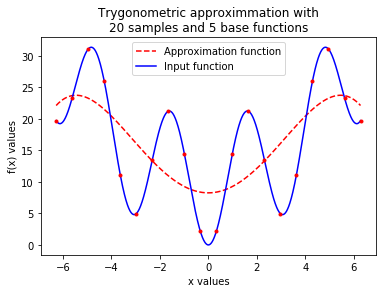

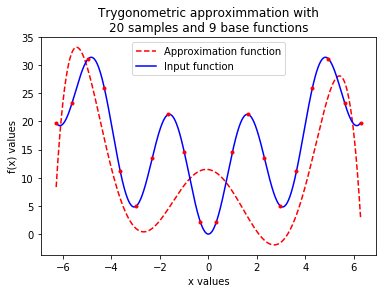

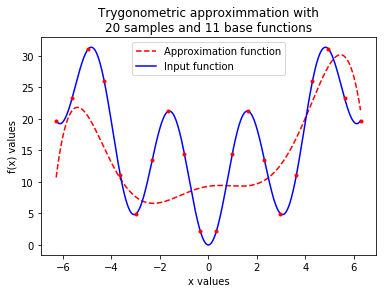

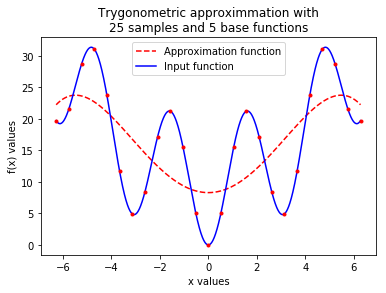

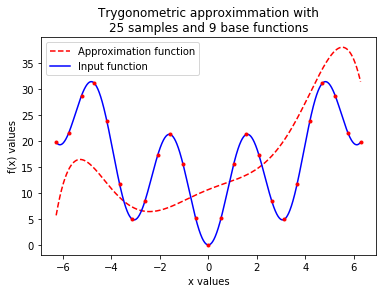

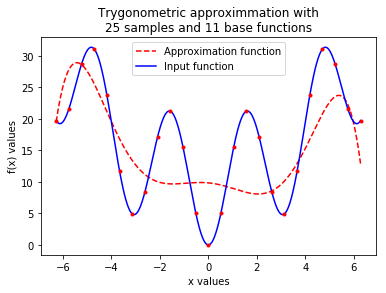

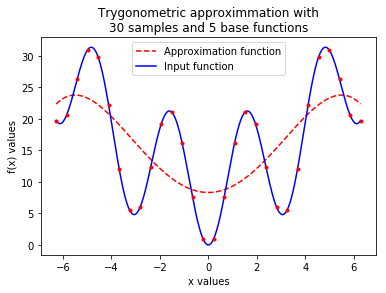

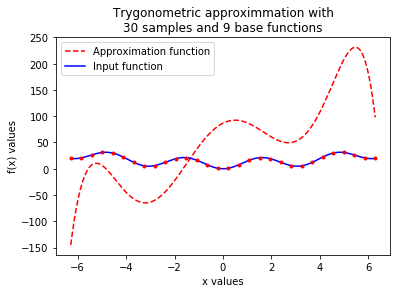

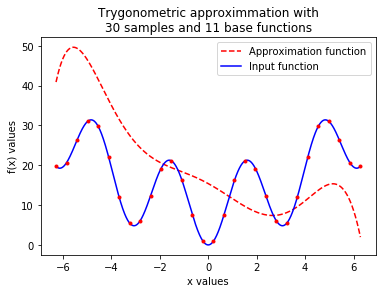

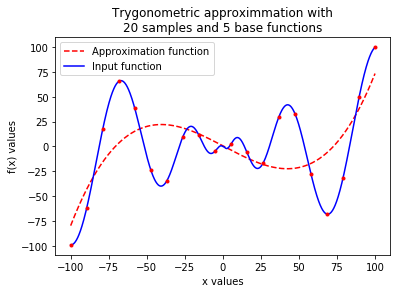

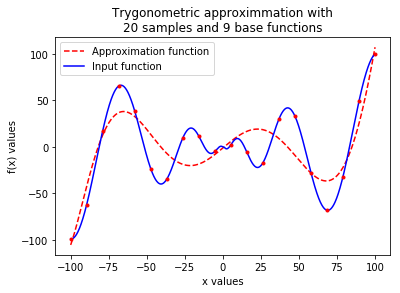

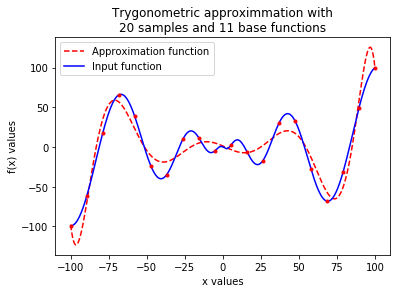

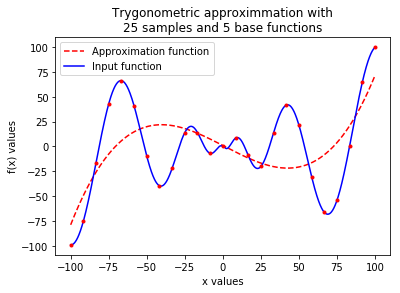

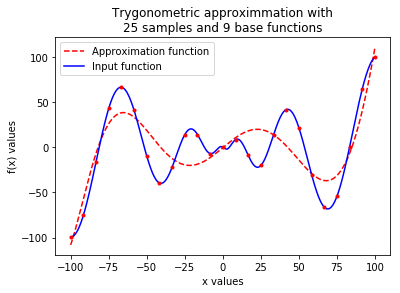

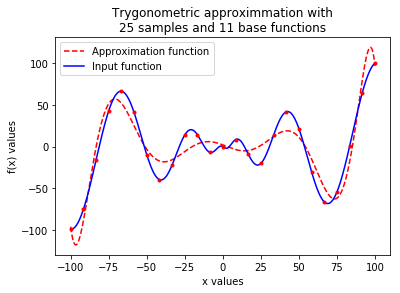

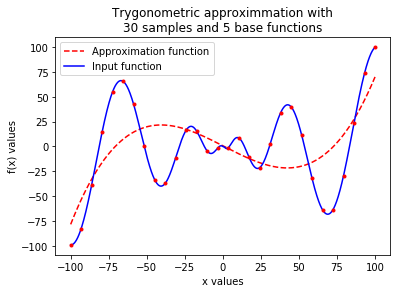

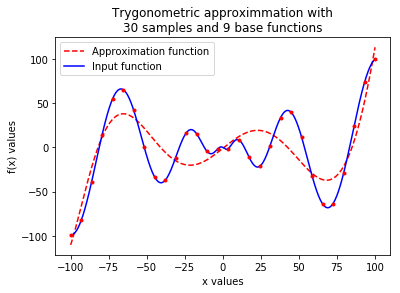

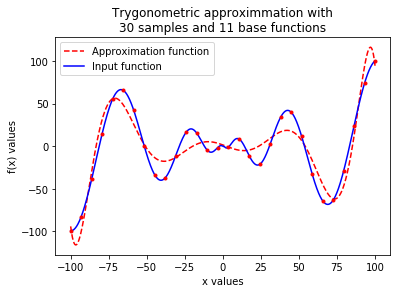

In [12]:
for f,d in data:
    x = np.linspace(d[0], d[1], 1000)
    
    # different configurations
    for n in [20,25,30]:
        for m in [5, 9, 11]:
            samples = generate_data(f, d, n)
            approximation = trygonometric_approximation(f, d, n, m)
            error = count_error(approximation, samples)
            
            # plot configuration
            plt.figure()

            # trygonometric approximation
            plt.plot(x, list(map(approximation, x)), 'r--', label='Approximation function')
            plt.legend()
            
            # input function
            plt.plot(x, list(map(f, x)), 'b', label='Input function')
            plt.plot(*zip(*samples), 'r.')
            plt.legend()
            
            plt.xlabel('x values')
            plt.ylabel('f(x) values')
            plt.title('Trygonometric approximmation with\n' + str(n) + ' samples and '+ str(m) + ' base functions')
            
            #plt.savefig('pol_aprox' + str(f.__name__) + str(n) + 'smps'+ str(m) + 'basef_s')